In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Matplotlib

### Matplotlib with Pandas

In [2]:
url_oceania = "https://raw.githubusercontent.com/clemsonciti/intro-to-python/master/data3/gapminder_gdp_oceania.csv"
data_o = pd.read_csv(url_oceania, index_col='country')
data_o

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


<Axes: >

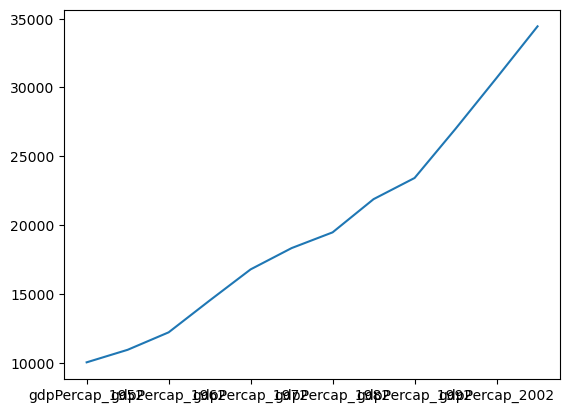

In [3]:
data_o.loc["Australia"].plot()

In [4]:
#data_o.columns
#Converting Column names into Integers
years = data_o.columns.str.strip('gdpPercap_').astype(int)
years

Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007], dtype='int32')

In [5]:
#Renaming column names
data_o.columns = years
data_o

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


<Axes: >

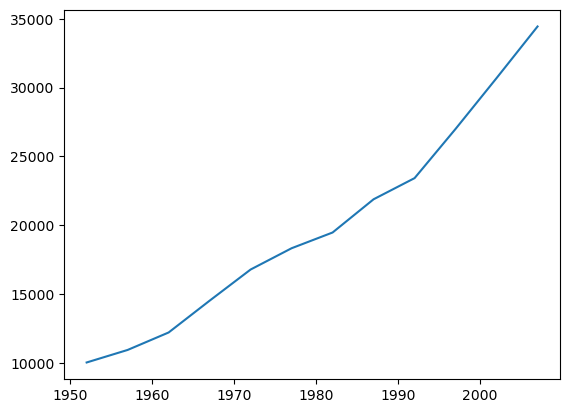

In [6]:
data_o.loc["Australia"].plot()

Text(0.5, 0, 'Years')

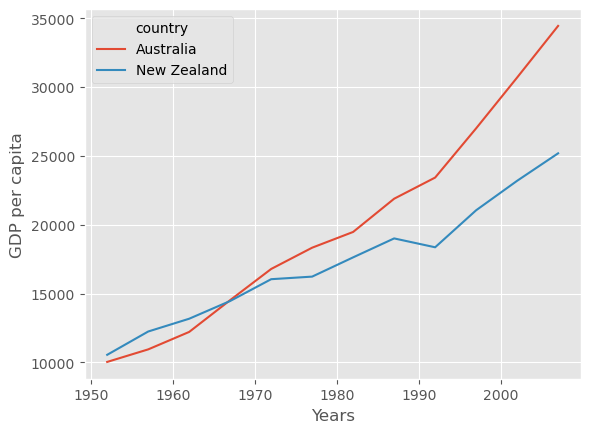

In [7]:
#Changing style of plot
plt.style.use('ggplot')
data_o.T.plot()
plt.ylabel('GDP per capita')
plt.xlabel('Years')

In [8]:
#Another way of plotting
gdp_nz = data_o.loc["New Zealand"]
gdp_aus = data_o.loc["Australia"]
data_o[1987]

country
Australia      21888.88903
New Zealand    19007.19129
Name: 1987, dtype: float64

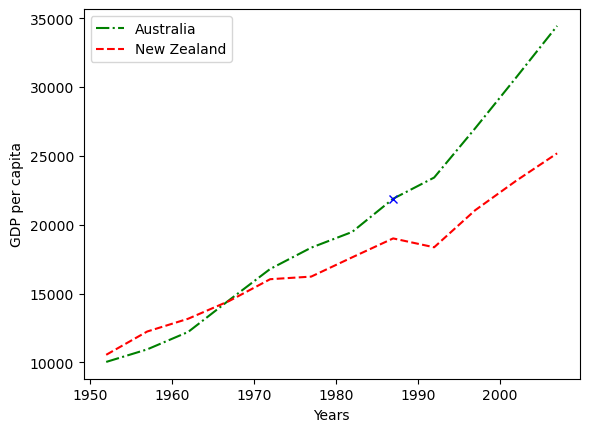

In [9]:
plt.style.use('default')
plt.plot(years,gdp_aus,"g-.", label="Australia")
plt.plot(years,gdp_nz,"r--", label="New Zealand")
##Plotting one specific point
plt.plot(1987,data_o.loc["Australia",1987],"bx")
#Axis labels
plt.ylabel('GDP per capita')
plt.xlabel('Years')
#adding legend
plt.legend(loc="best")
#plt.xticks(rotation=60)
plt.savefig("oceania.png")

### Other Types of plots: Bar and Scatter Plots

In [10]:
#Creating example Data
x = np.arange(10)
y = x**2
b1 = ["cats", "dogs", "birds", "fishes"]
b2 = [3,6,2,5]
#s1 = np.arange(10)
s = np.random.randint(2,9,10)
x1 = np.linspace(0, 2*np.pi, 200)
y1 = np.sin(2*(x1**2))

Text(0, 0.5, 'xsquared')

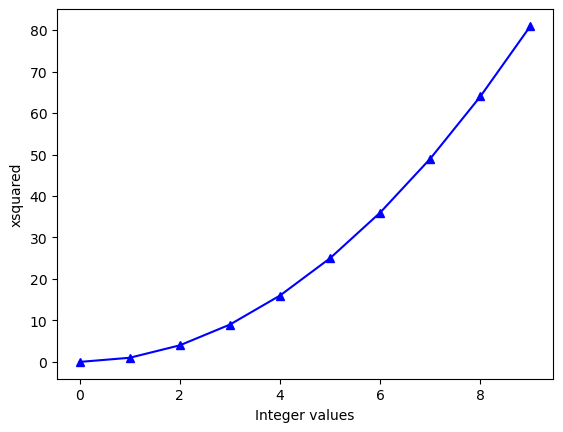

In [11]:
#line plot
plt.plot(x,y, 'b^-')
plt.xlabel("Integer values")
plt.ylabel("xsquared")

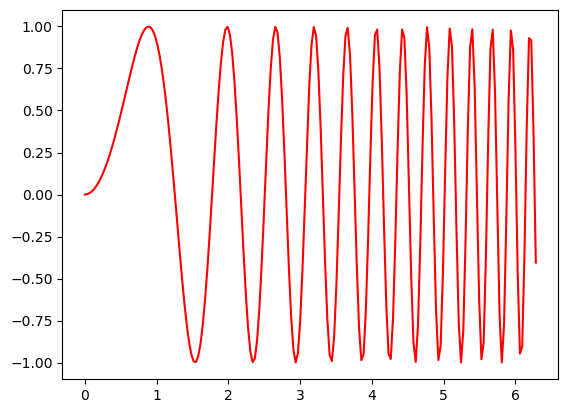

In [12]:
#Line plot 2
plt.plot(x1,y1, 'r')

Text(0, 0.5, 'No. of Pets')

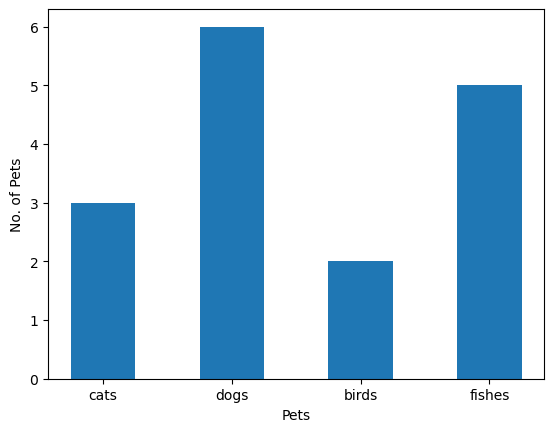

In [13]:
#Bar plots
plt.bar(b1,b2,width=0.5)
plt.xlabel("Pets")
plt.ylabel("No. of Pets")

Text(0, 0.5, 'Measured Values')

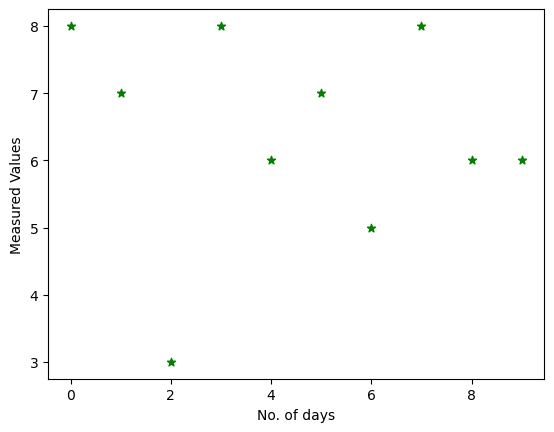

In [14]:
#Scatter plots
plt.scatter(x,s, c = "green", marker = "*")
plt.xlabel("No. of days")
plt.ylabel("Measured Values")

## Subplots

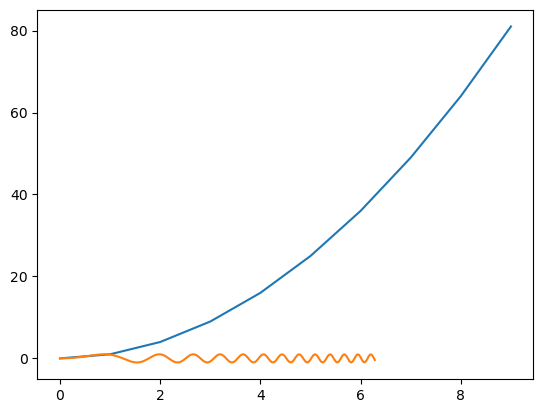

In [15]:
fig, ax = plt.subplots()
#print(ax)
ax.plot(x,y)
ax.plot(x1,y1)

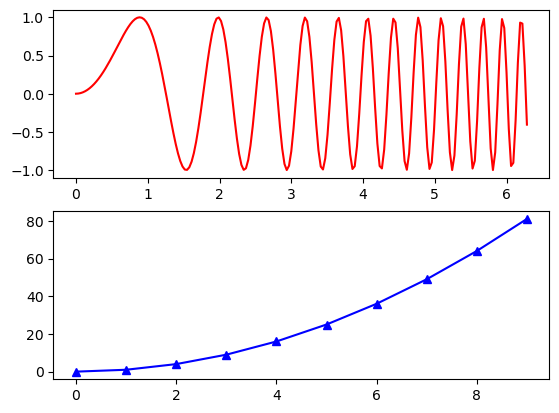

In [16]:
fig, ax = plt.subplots(2)
#print(ax)
ax[1].plot(x,y, "b^-")
ax[0].plot(x1,y1, 'r')

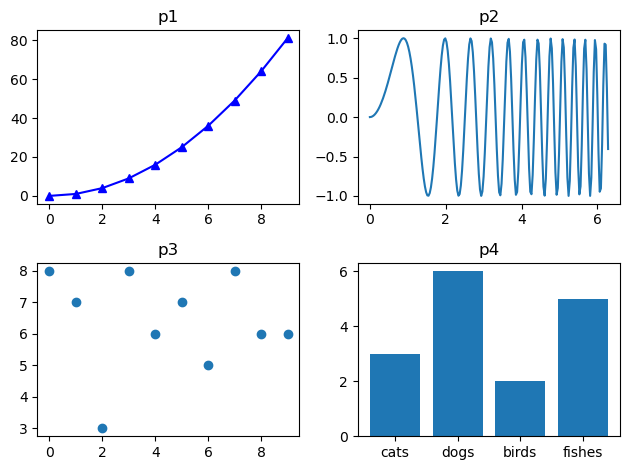

In [17]:
fig1, ax1 = plt.subplots(2,2)
#print(fig1, ax1)
ax1[0,0].plot(x,y,"b^-")
ax1[0,0].set_title("p1")
ax1[0,1].plot(x1,y1)
ax1[0,1].set_title("p2")
ax1[1,0].scatter(x,s)
ax1[1,0].set_title("p3")
ax1[1,1].bar(b1,b2)
ax1[1,1].set_title("p4")
fig1.tight_layout()

## Other types of plots

reference: http://www.math.buffalo.edu/~badzioch/MTH337/PT/PT-image_processing/PT-image_processing.html

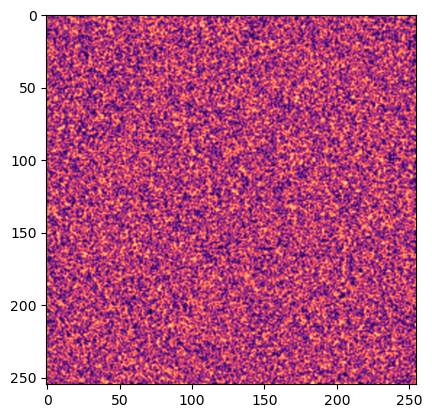

In [18]:
np.random.seed(2023)
mat2 = np.random.randint(-255,255,65025).reshape(255,255)
#plt.imshow(mat2)
#plt.imshow(mat2, interpolation = "bicubic") ## bilinear, gaussian, lanczos, bicubic
plt.imshow(mat2, interpolation = "bicubic", cmap = 'magma') #cmaps: viridis, plasma, inferno, magma
#plt.colorbar() ##Add colorbar for to show values

In [19]:
#!wget https://upload.wikimedia.org/wikipedia/commons/3/3d/Fesoj_-_Papilio_machaon_%28by%29.jpg -O butterfly.JPG

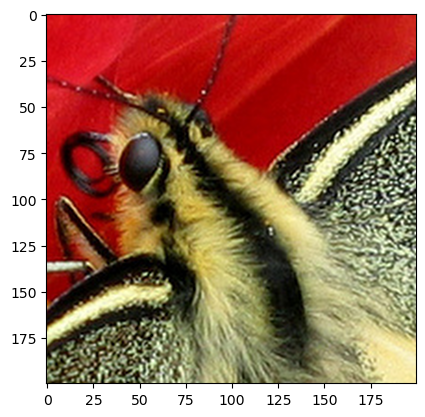

In [20]:
butterfly = plt.imread("butterfly.jpg")
#print(type(butterfly))
#plt.imshow(butterfly)
plt.imshow(butterfly[200:400,350:550], interpolation="lanczos")

## Example: Random Walk

### Solution 1

In [21]:
def random_walk(num_steps):
    walk = np.zeros(num_steps)
    for step in range(len(walk)):
        #Coin flip result
        coin_flip_result = np.random.randint(2)
        if coin_flip_result == 0:
            #Heads
            walk[step] = walk[step-1]+1
        else:
            #Tails
            walk[step] = walk[step-1]-1
    plt.plot(walk)

CPU times: total: 688 ms
Wall time: 697 ms


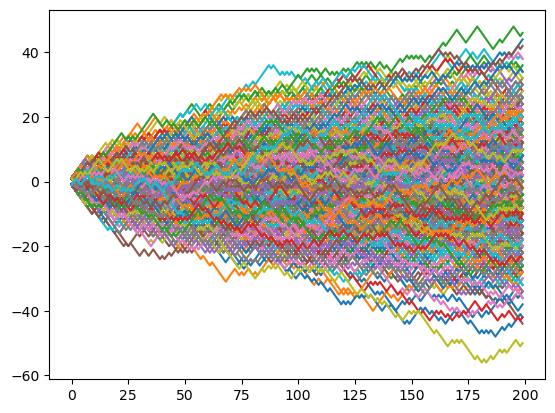

In [22]:
%%time
walk_range = 1000
num_steps = 200
for walk in range(walk_range):
    random_walk(num_steps)

### Solution 2

CPU times: total: 297 ms
Wall time: 306 ms


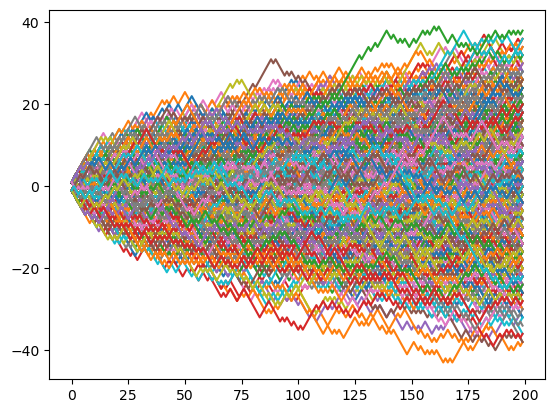

In [23]:
%%time
for walk in range(walk_range):
    plt.plot(np.cumsum([1 if i else -1 for i in np.random.randint(2, size=num_steps)]))